Phy 415 - Hw 5

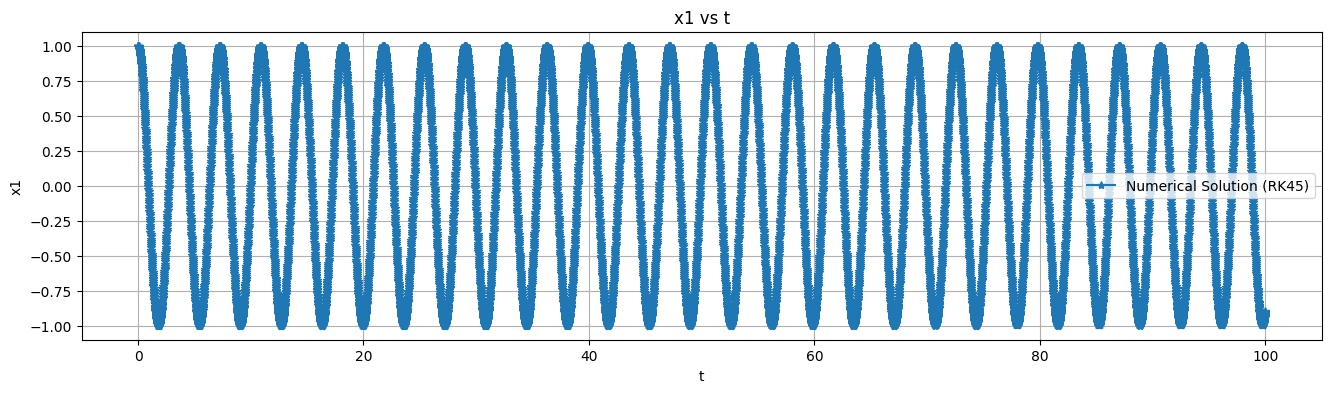

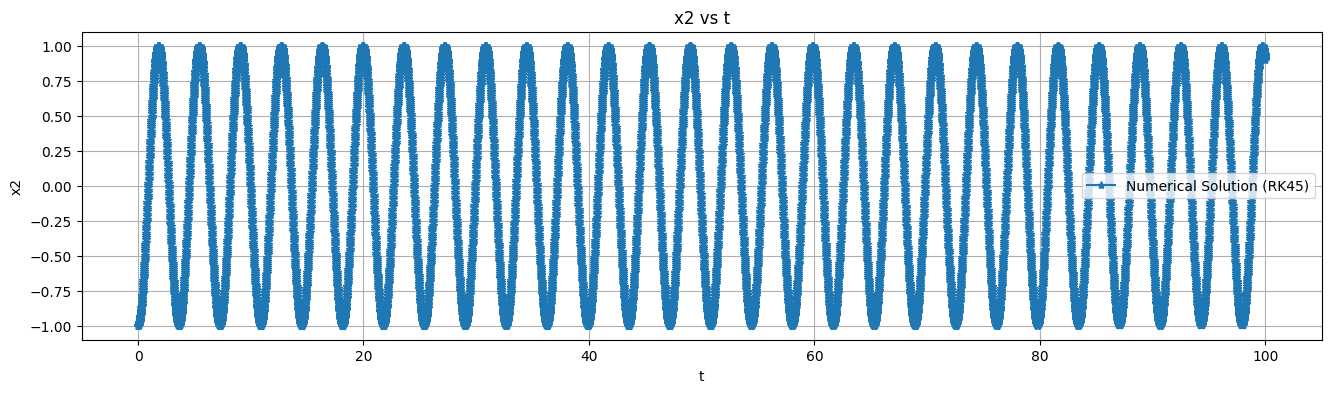

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 1. Derivatives Function
def diffyqs(t, curr_vals, k, m):

    x1, v1, x2, v2 = curr_vals
    
    v1dot = -2*k*x1/m + k*x2/m

    v2dot = -2*k*x2/m + k*x1/m

    return v1, v1dot, v2, v2dot # solution will return in this order, but integrated (r,v,theta,ω)

# 2. Time Setup
tmax = 100
dt = 0.01 # unneccecarily small dt to make plot super smooth
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
k = 1
m = 1
x0 = [1,0,-1,0] 

# 4. Call Integrator
solved = solve_ivp(diffyqs, (0, tmax), x0, t_eval = t, args = (k, m, ), method="RK45")

# 5. Visualization and Comparison to analytical solution
plt.figure(figsize=(16, 4))
plt.plot(t, solved.y[0], label = "Numerical Solution (RK45)", marker='*')
plt.title("x1 vs t")
plt.xlabel("t")
plt.ylabel("x1")
plt.legend()
plt.grid()

plt.figure(figsize=(16, 4))
plt.plot(t, solved.y[2], label = "Numerical Solution (RK45)", marker='*')
plt.title("x2 vs t")
plt.xlabel("t")
plt.ylabel("x2")
plt.legend()
plt.grid()

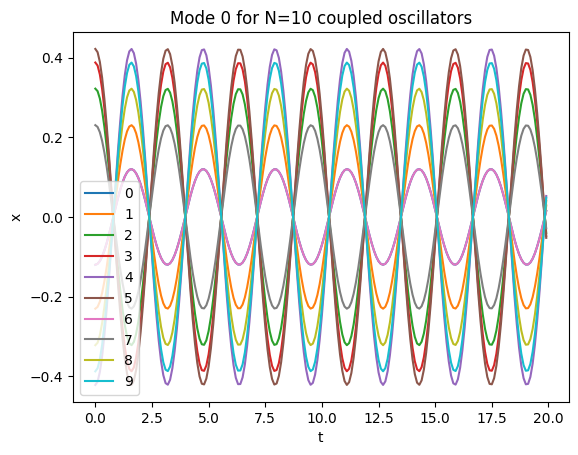

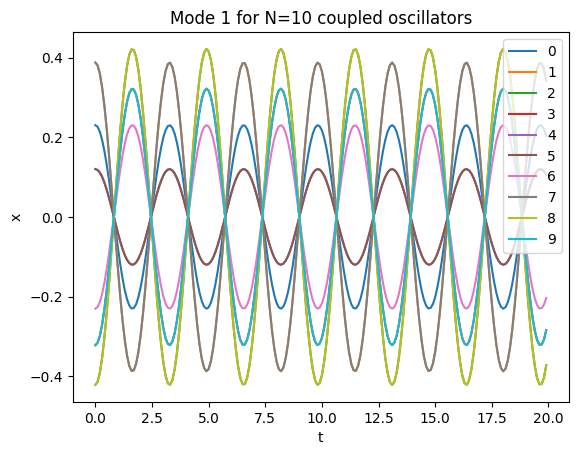

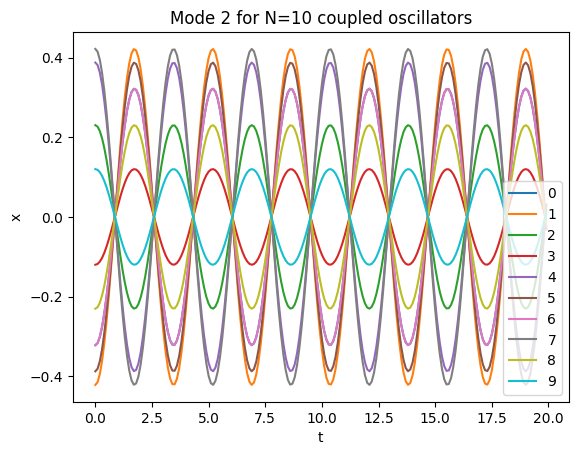

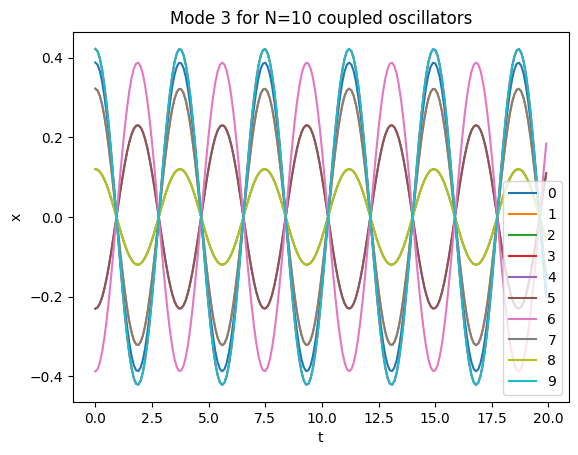

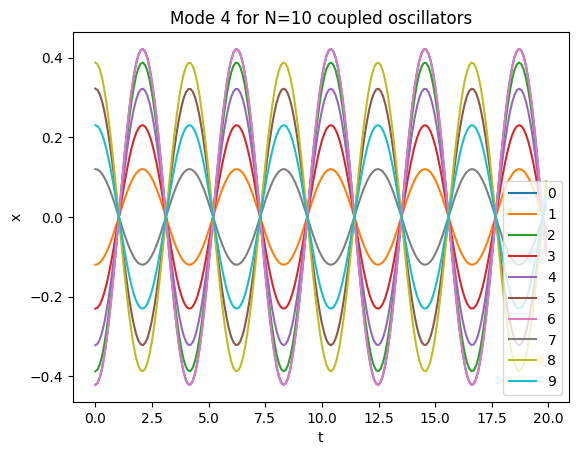

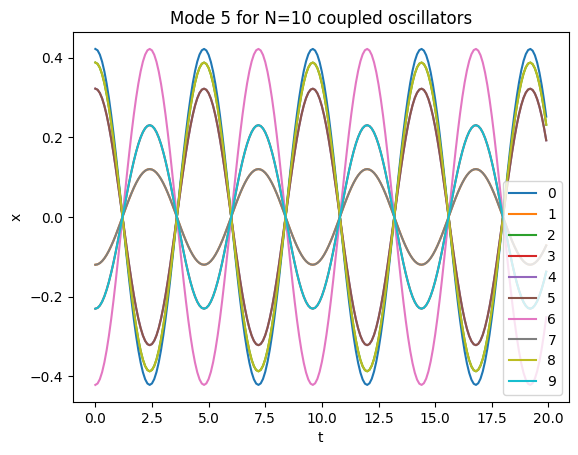

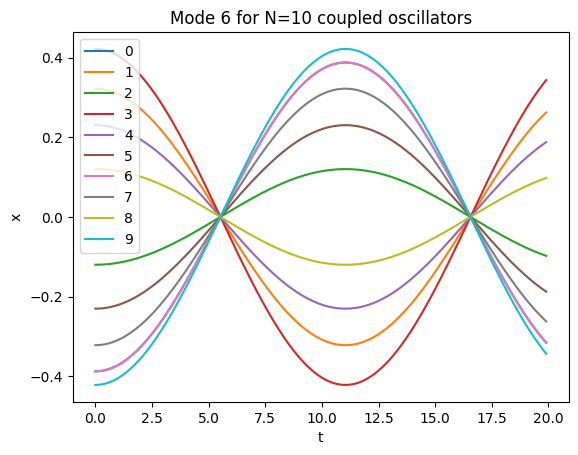

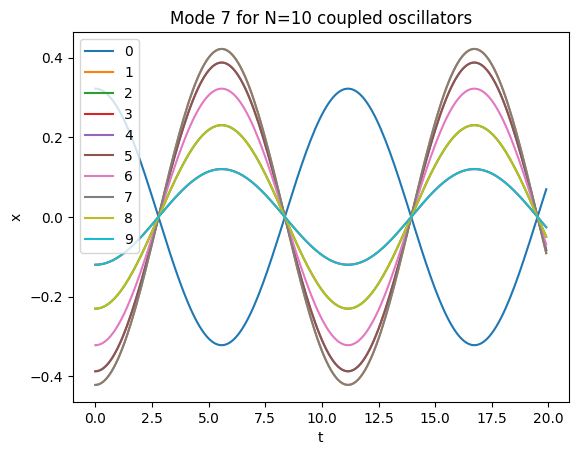

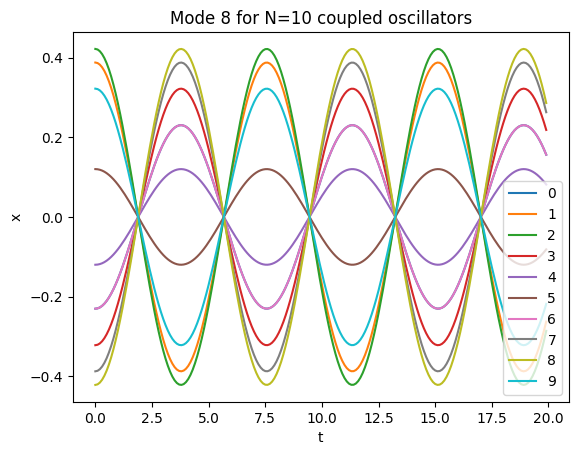

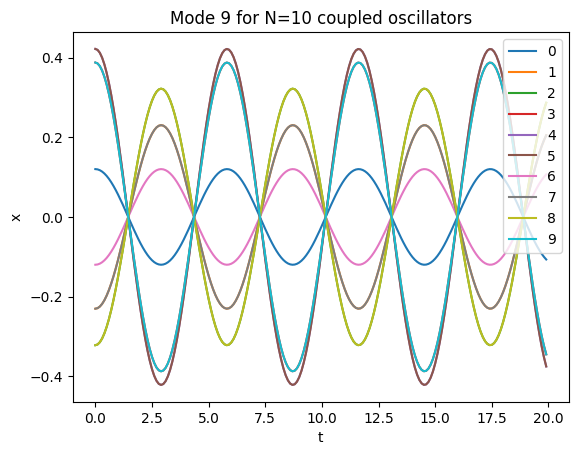

--- 4.494993686676025 seconds ---


In [2]:
#Loading libraries
import time
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la ## For the numerical eigenvalue methods
from sympy import * ## For symbolic eigenvalue methods
init_printing(use_unicode=True)  ## display nice math

start_time = time.time()

# Plot the Modes
def plot_Modes(N, eigenvals, eigenvecs, tmax):
    M = 9 #mode number
    t = np.arange(0,tmax,0.1)   # start,stop,step

    for n in Range(N):
        for i in Range(N):
            plt.plot(t,eigenvecs[n,i]*np.cos(np.sqrt(-eigenvals[n])*t), label=i)
   
        plt.title('Mode '+str(n)+' for N='+str(N)+' coupled oscillators')
        plt.xlabel("t")
        plt.ylabel("x")
        plt.legend()
        plt.show()

# Create NxN matrix for our coupled oscillators
def make_Matrix(n, k, m):
    A = np.zeros((n,n), dtype=int)
    
    for i in range(n):
        for j in range(n):
            if (i == j):
                A[i][j] = -2*k/m
            elif i == j+1 or i == j-1:
                A[i][j] = k/m
            else:
                A[i][j] = 0
    return A

#defining the matrix for N oscillators
N = 10
k = 1
m = 1
tmax = 20
M = make_Matrix(N,k,m)
#print(M)

eigenvals, eigenvecs = la.eig(M)
#print(eigenvals)
#print(eigenvecs)

plot_Modes(N, eigenvals, eigenvecs, tmax)

print("--- %s seconds ---" % (time.time() - start_time))

# Worked 5 - Little Jigglers

RLC circuits have damped oscillating currents, which can be coupled together various ways.

In this worked problem, we will build up from an undamped LC circuit oscillator to n-coupled RLC circuits and analyze their modes.

Despite there being no position or velocity at play here, a paper from 2017 describes the process we can use to set up a lagrangian and analyze  circuits [\[1\]](https://arxiv.org/abs/1711.10245). As long as current and charge is conserved, and kirchoff's rules are satisfied, we can use this to describe our coupuled circuits.

Rather than position and velocity, the general coordinates used in many physical systems we have observed thus far, our general coordinates are current and charge. Charge and current are directly related similarly to position and velocity, so we can make a lagrangian for a system of capacitors and inductors.

Instead of kinetic enery and potential energy, we now have current-related energy and charge-related energy. Inductor energy depends on current, while capacitor energy depends on charge location

$$
\mathcal{L} = T - U \\
\text{Inductor energy: }T = \frac{1}{2} L I^2 = \frac{1}{2} L \dot Q^2  \\
\text{Capacitor energy: }U = \frac{1}{2} \frac{Q^2}{C}
$$
For a simple LC circuit this yields
$$
\mathcal{L} = \frac{1}{2} L \dot Q^2 - \frac{1}{2} \frac{Q^2}{C}\\
\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{Q}_i} \right) - \frac{\partial \mathcal{L} }{\partial Q_i} = 0

$$

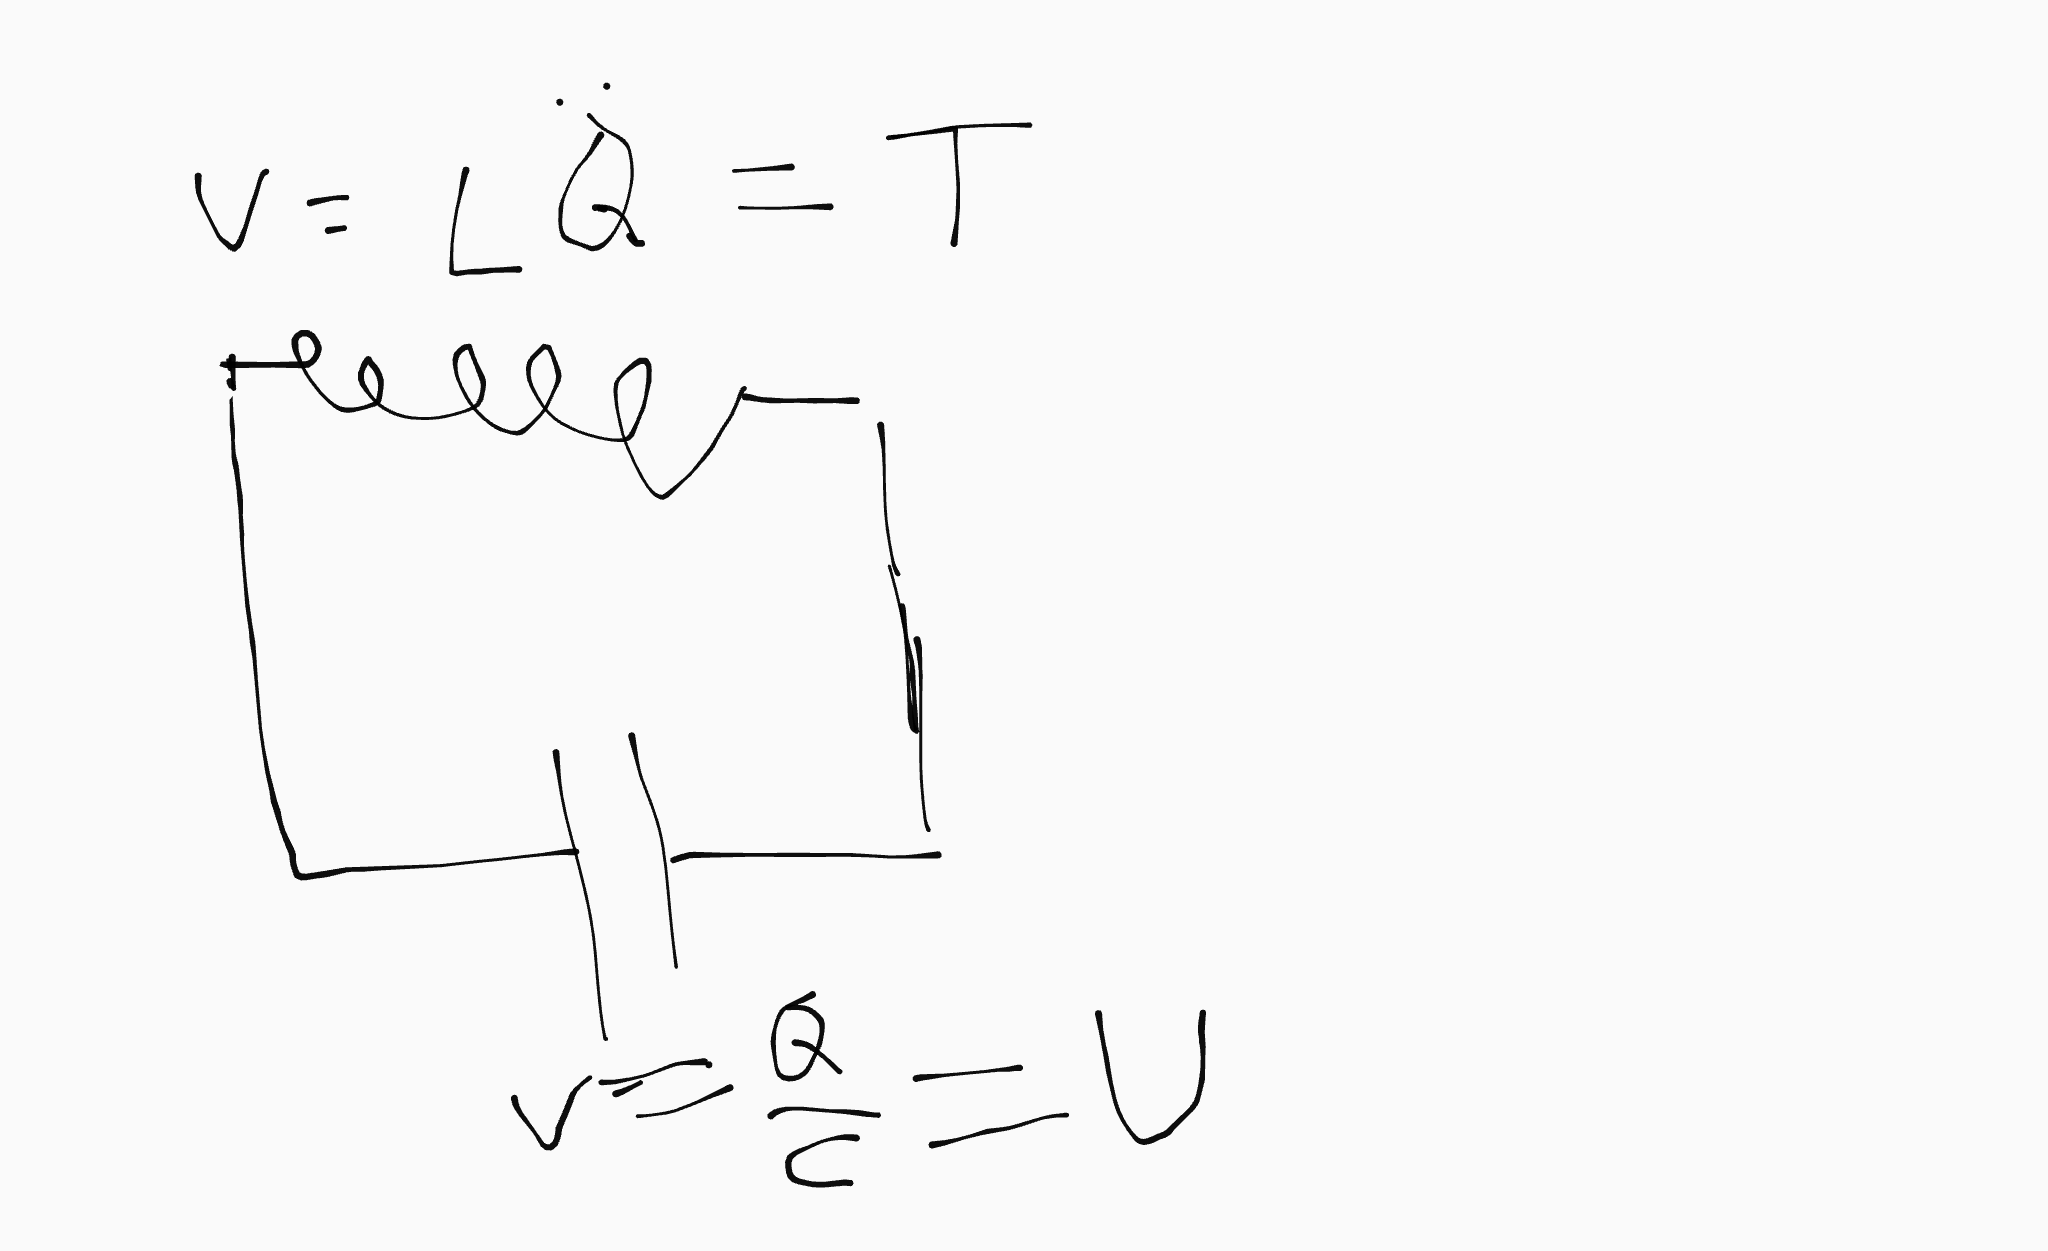
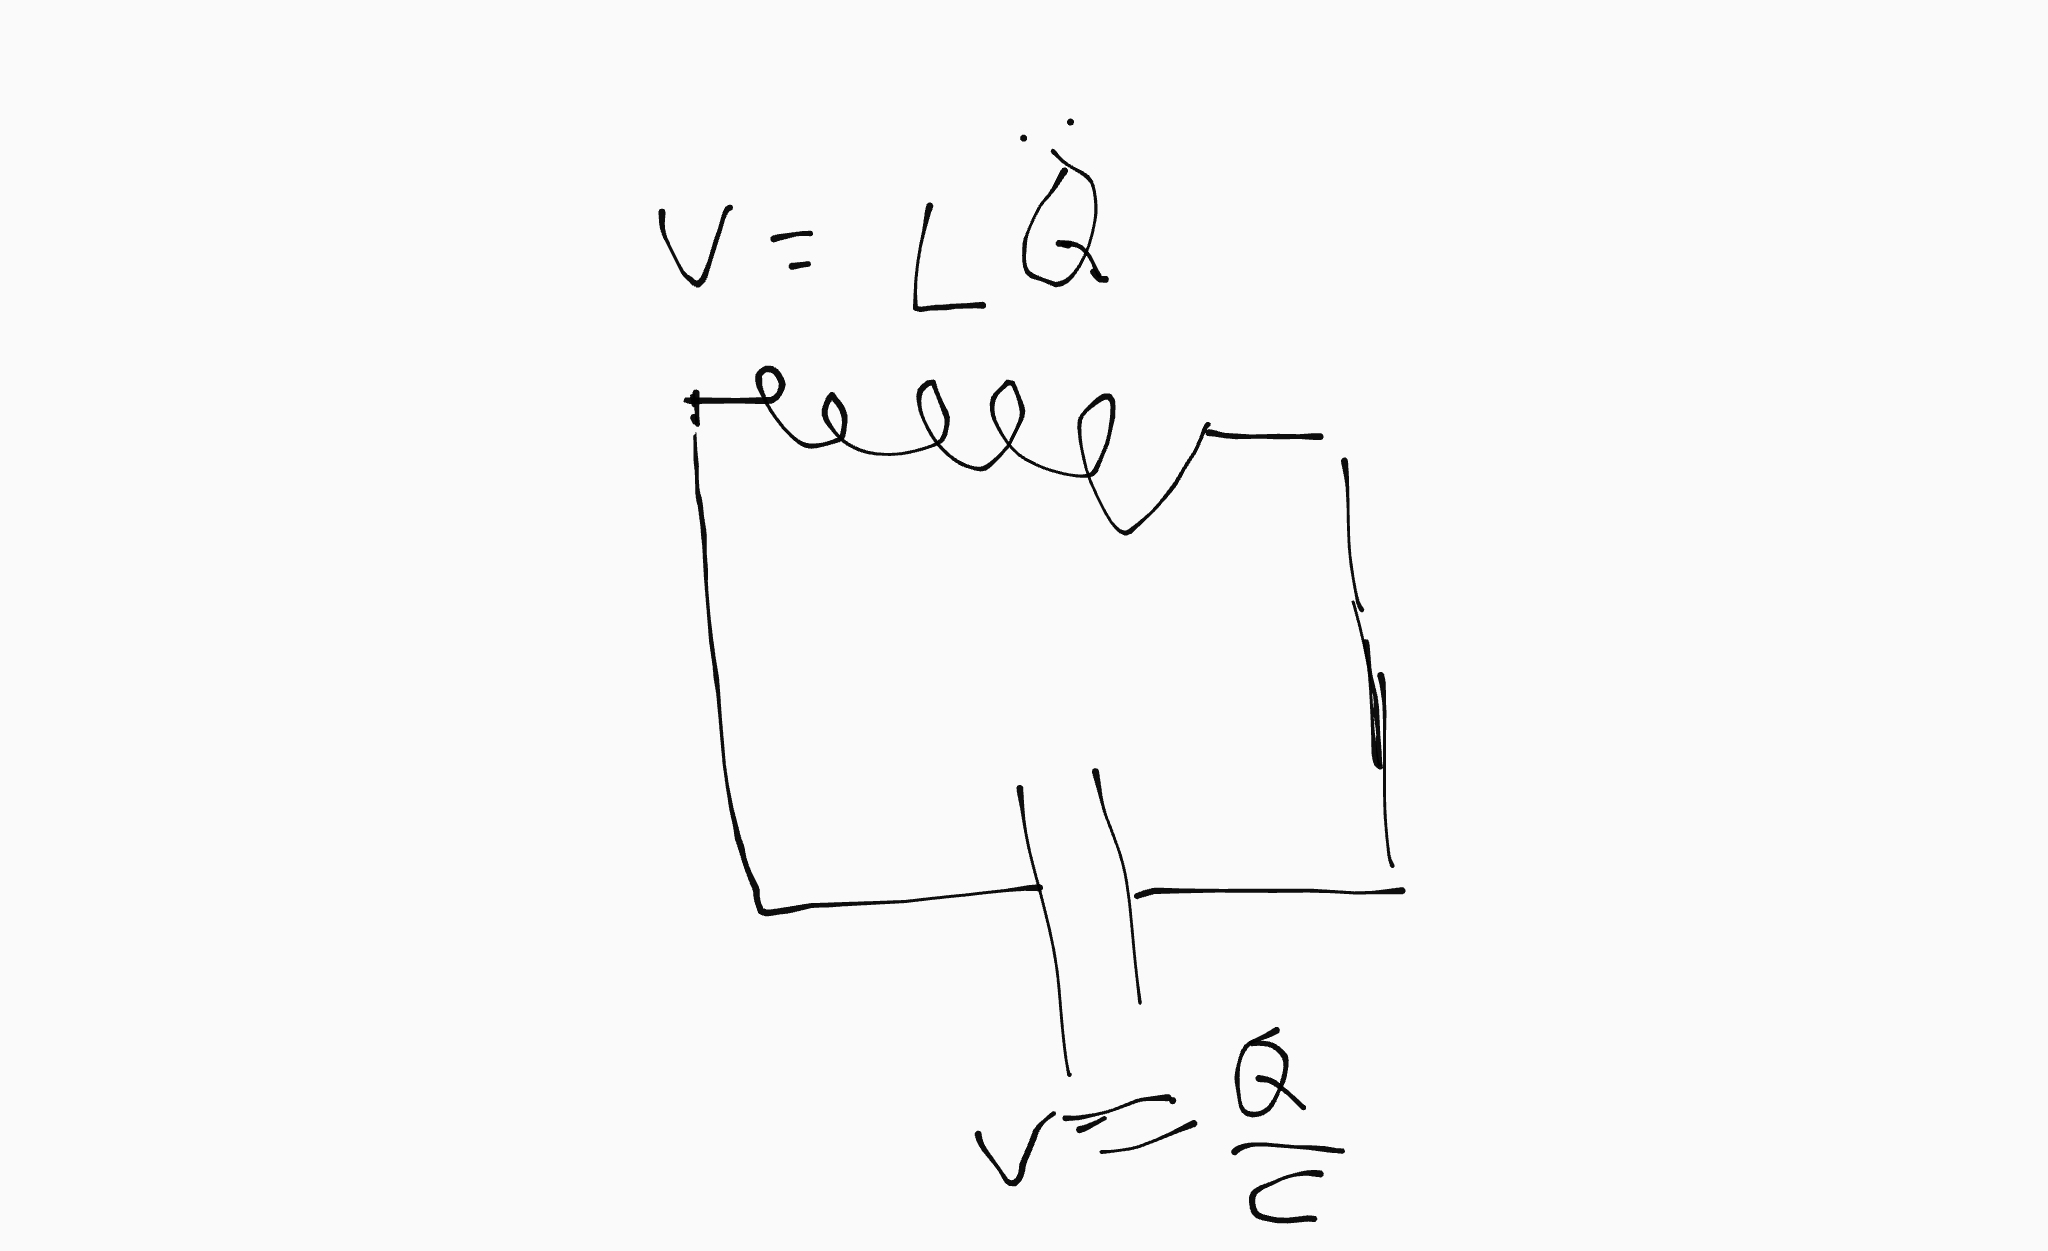

$$
\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{Q}_i} \right) = \frac{d}{dt} L \dot Q = L\ddot Q \\
\frac{\partial \mathcal{L} }{\partial Q_i} = -\frac{1}{C} Q \\
L\ddot Q +\frac{1}{C} Q = 0 \\
\ddot Q = -\frac{1}{LC} Q \\
Q(t) = Ae^{i \omega t} + Be^{-i \omega t} \\
Q(0) = A+B
$$

Where $\omega = \frac{1}{\sqrt{LC}}$. Q(t) represents the charge on the capacitor, as it is the only element which holds charge. The current is thus

$$
I(t) = \dot Q(t) = i\omega \left(Ae^{i\omega t} + Be^{i\omega t} \right) = i\omega Q(t)\\
I(0) = i\omega \left(A - B \right)
$$


0.7071067811865475


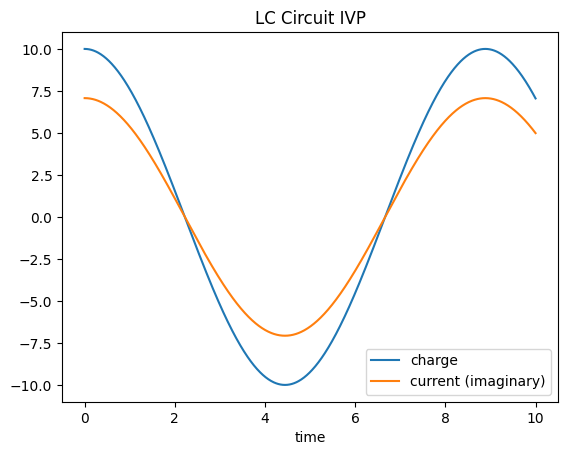

In [3]:
import numpy as np
from numpy import sqrt, exp
import matplotlib.pyplot as plt

i = complex(0, 1)

L = 1
C = 2
omega = 1/(sqrt(L*C))
print(omega)

# Convert capacitor voltage to charge
V0_cap = 5
Q0 = V0_cap*C 
I0 = 0

def get_initial_conditions(Q0, I0):
    '''
    A+B = Q0
    A-B = I0
    '''
    return (Q0+I0)/2, (Q0-I0)/2

A, B = get_initial_conditions(Q0, I0)
params = [A, B, omega]

def charge_eqn(t, params):
    A, B, omega = params
    return A*exp(i* omega *t) + B*exp(-i*omega*t)

time = np.linspace(0, 10, 1000)
charge = charge_eqn(time, params)

plt.plot(time, charge.real, label='charge')
plt.plot(time, (i*omega*charge).imag, label='current (imaginary)')
plt.title('LC Circuit IVP')
plt.xlabel('time')
plt.legend();

In the above plot, our angular frequency $\omega = \frac{1}{\sqrt{LC}} = \frac{\sqrt{2}}{2}$, which corresponds to the period observed $T = \frac{2\pi}{\omega}=8.9s$

Typically, we'll now move on to RLC circuits, but for this project LC oscillation is enough. Now we will couple LC circuits together using capacitors

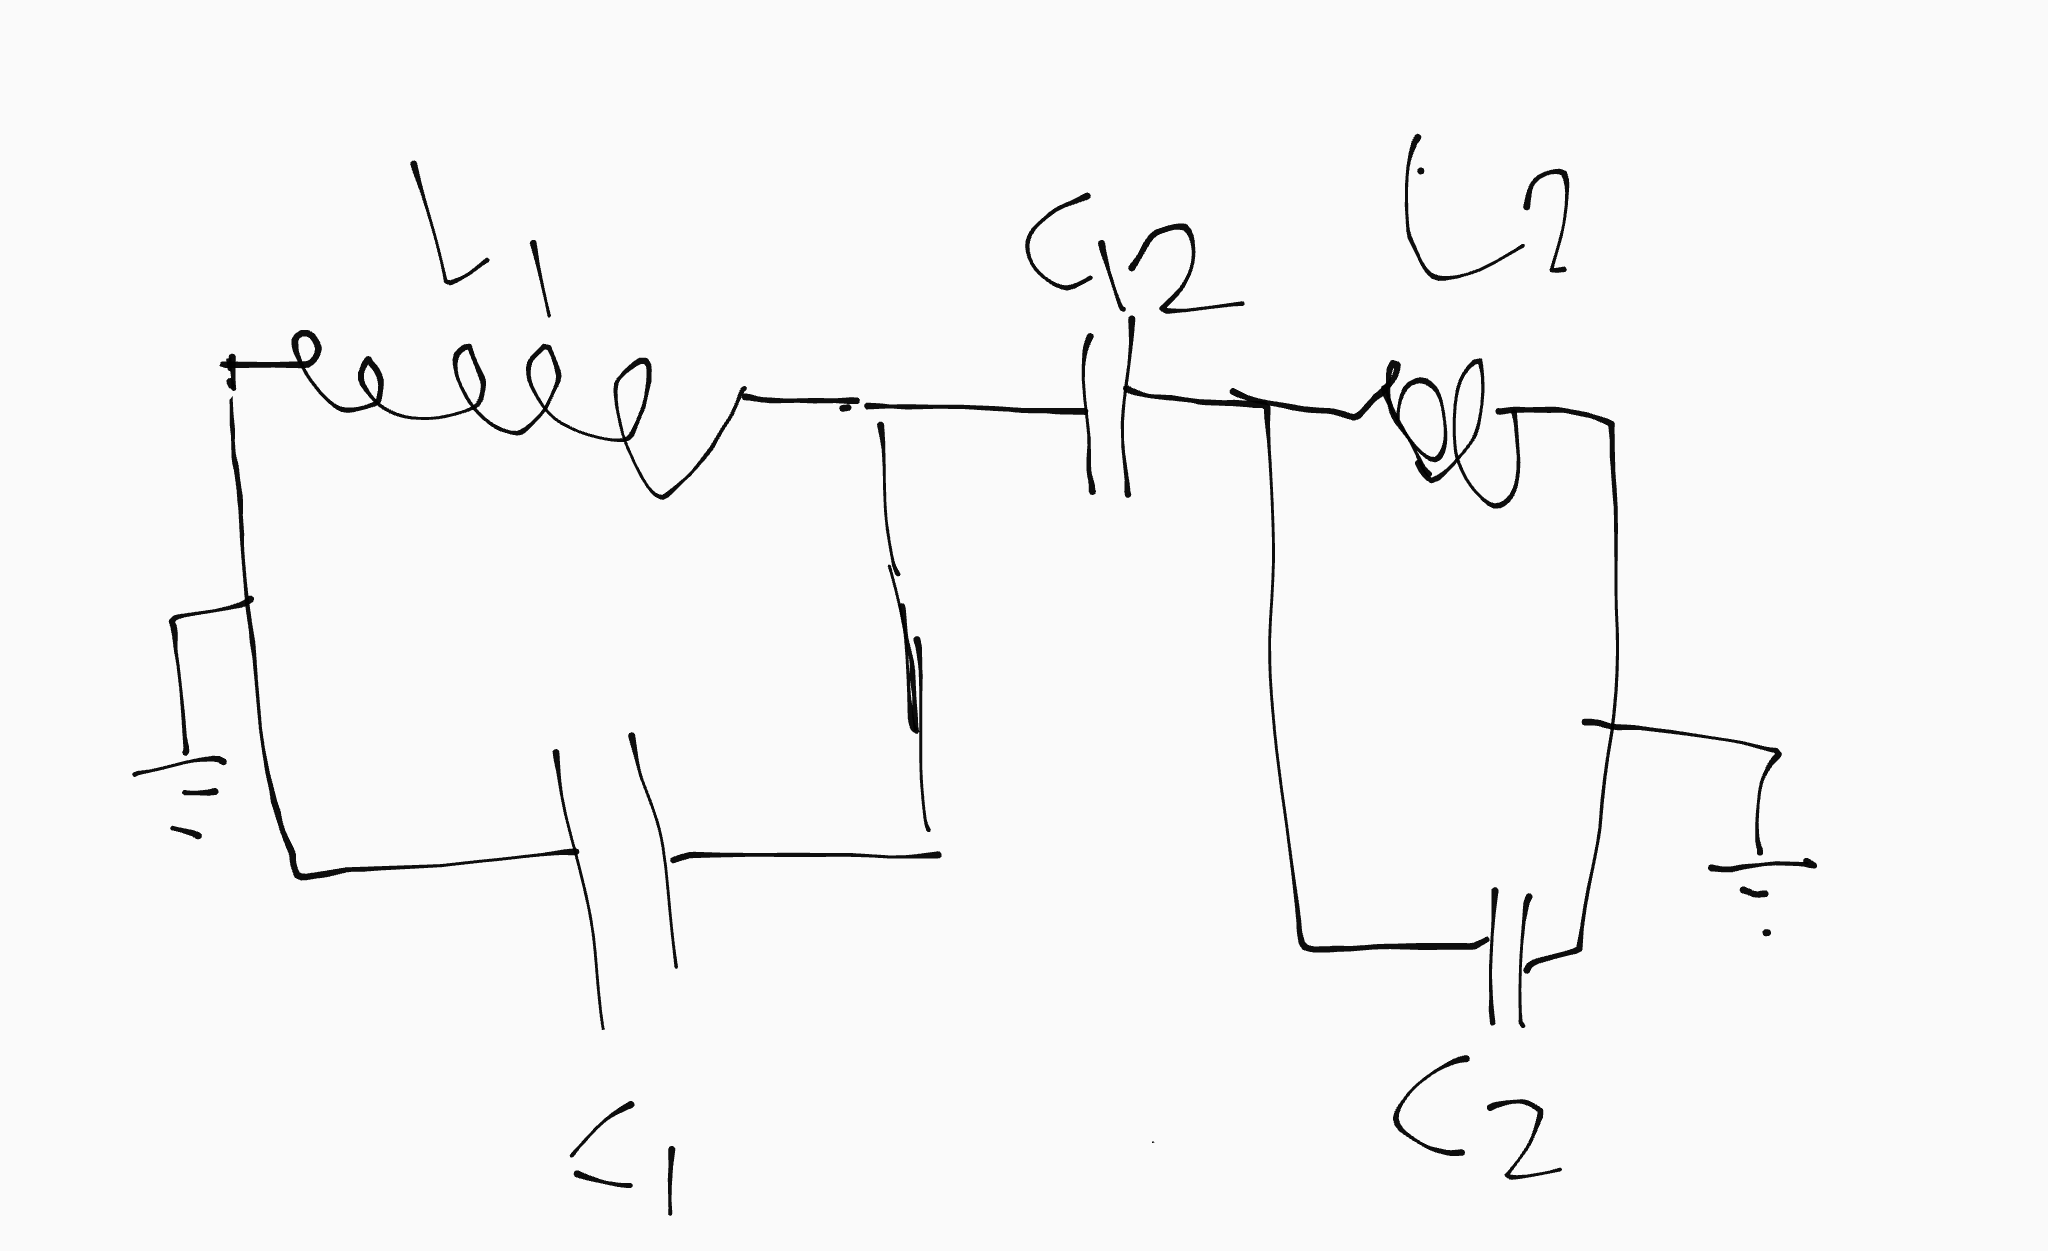
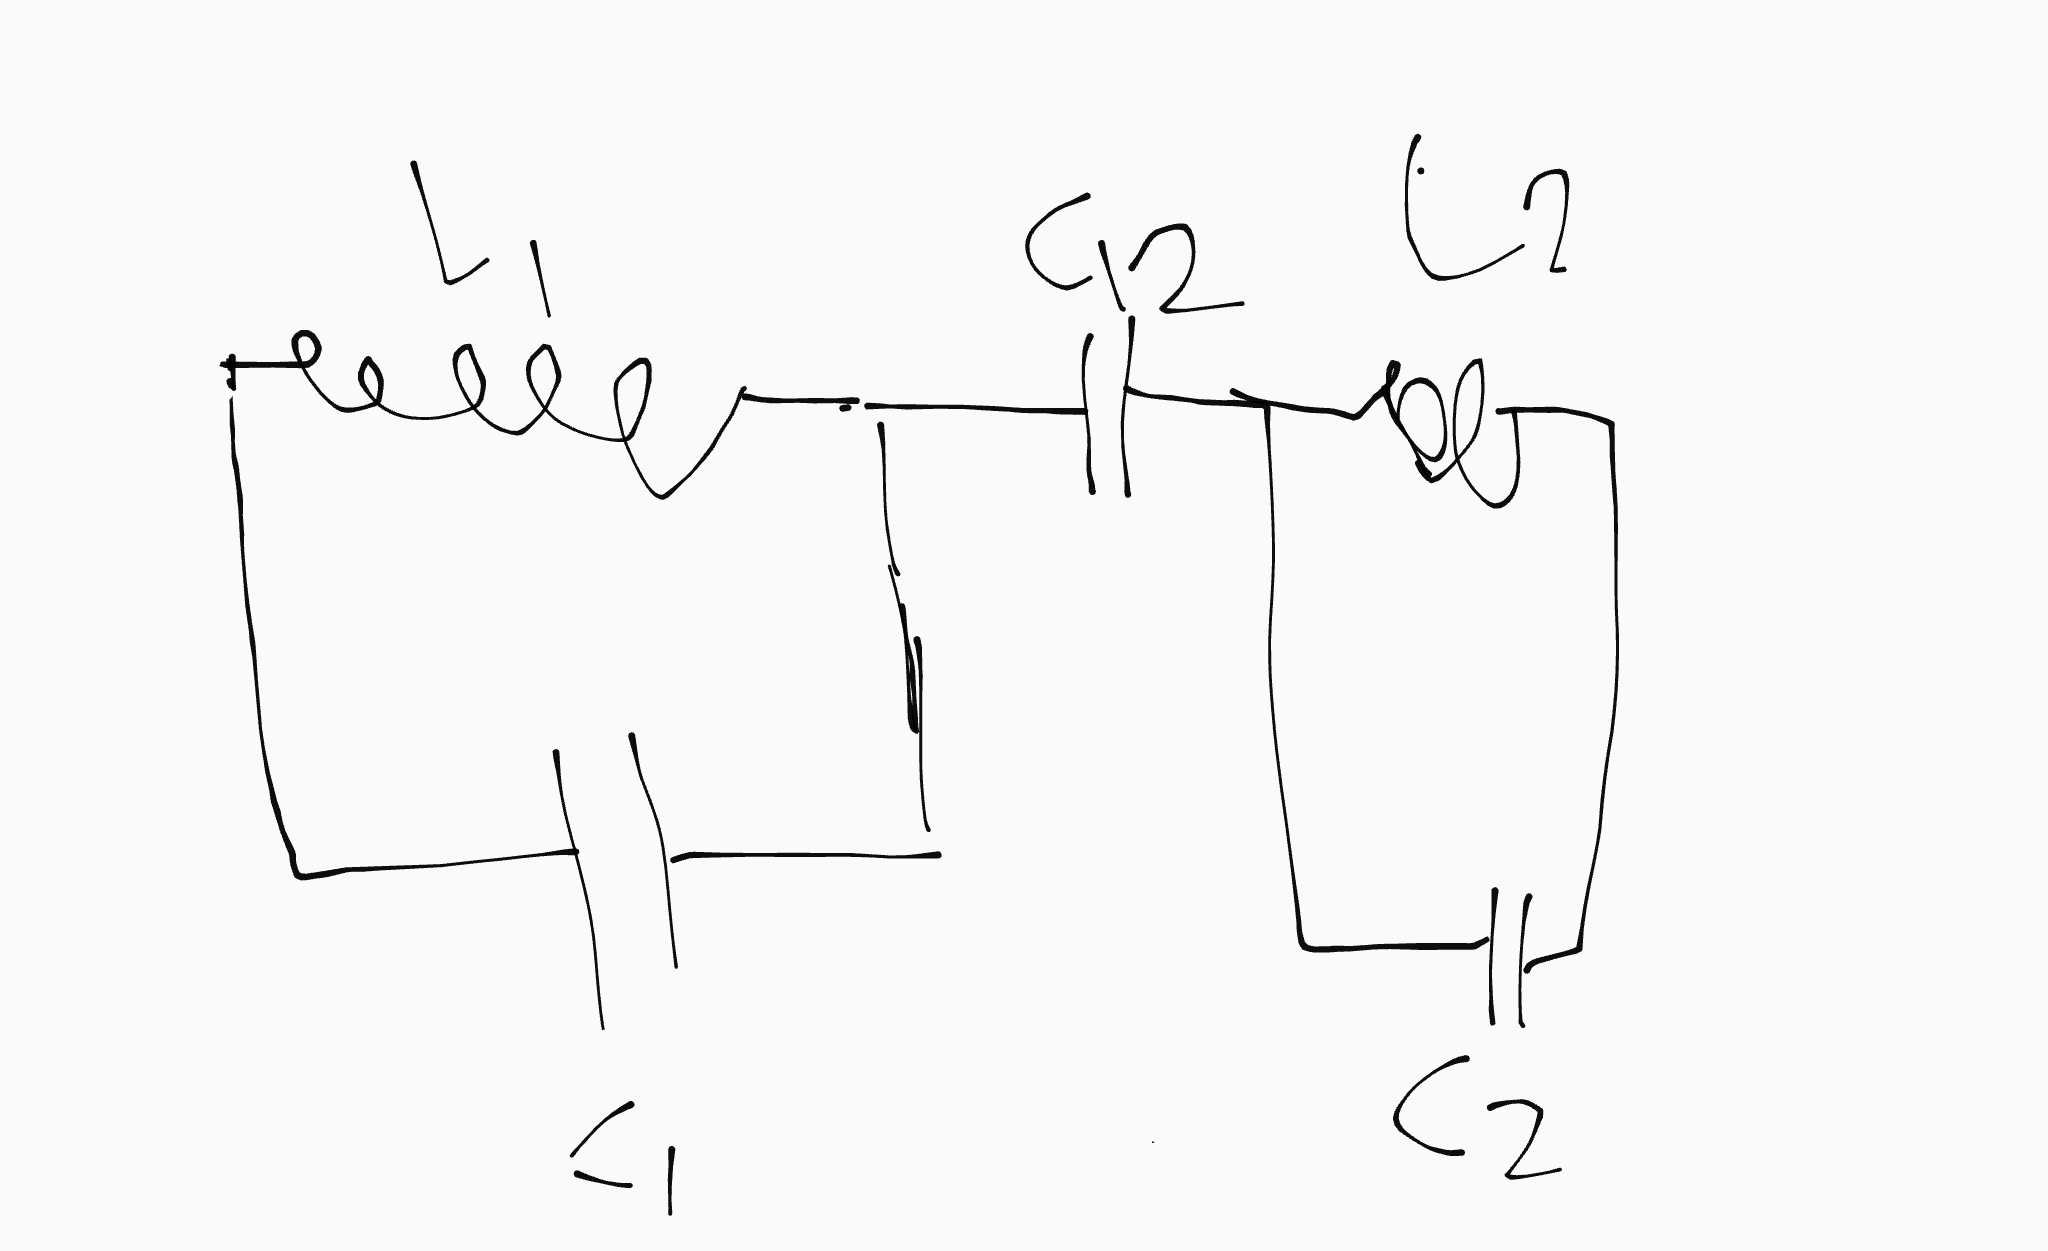
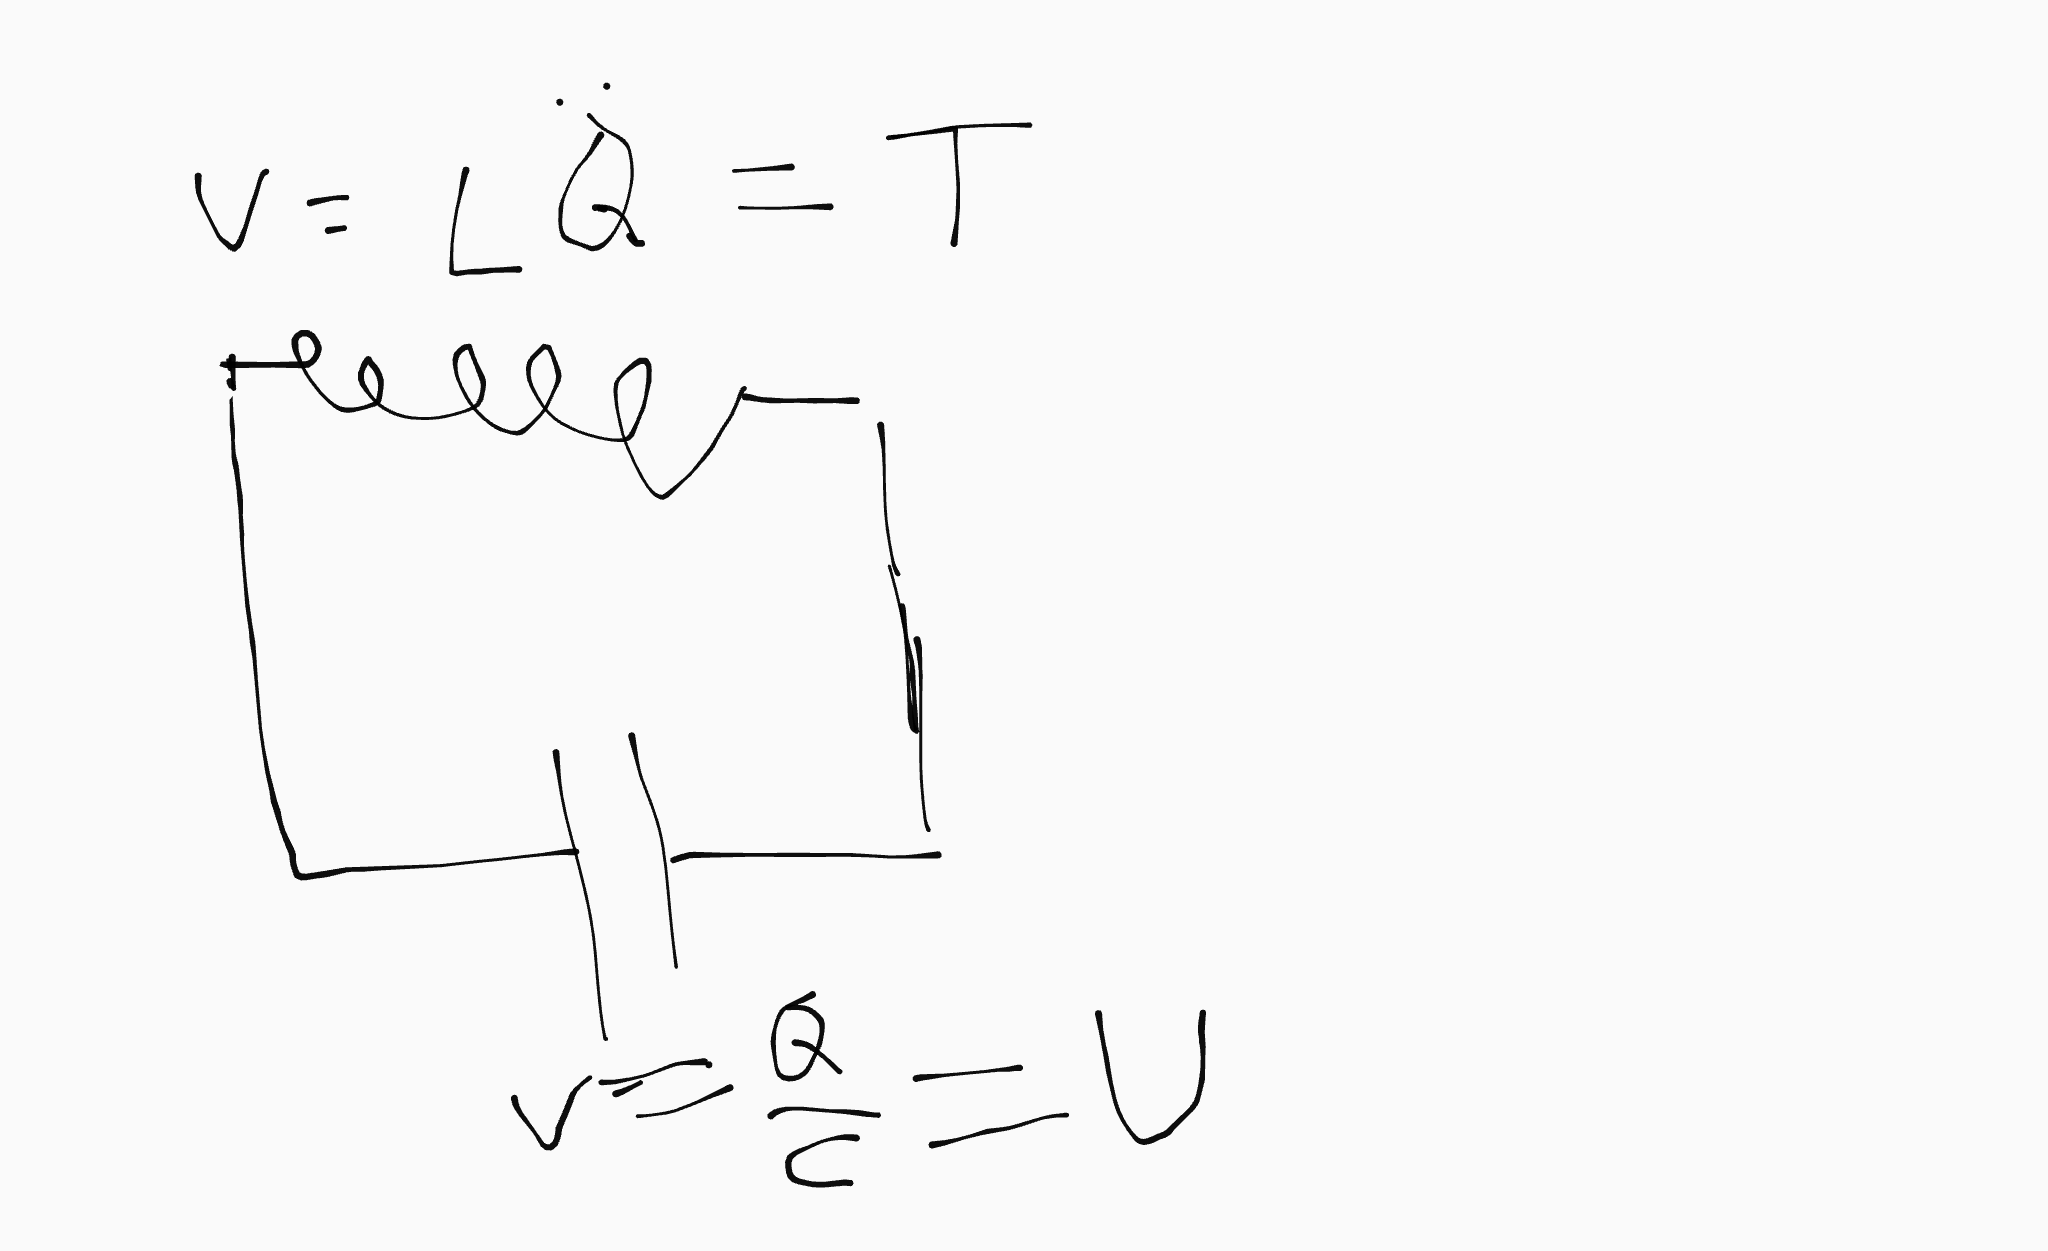

Note that the voltage across $C_{12}$ is the difference between voltage across $C_1$ and $C_2$, and both oscillators are also connected via grounding as well as the capacitor.

Here, we have two circuits which are capacitatively coupled. Since the charge on $C_1$ and $C_2$ is separated by $C_{12}$, the voltage across it is determined by the difference in charge stored on $C_1$ and $C_2$. This yields

$$
L_1 \ddot Q_1 + \frac{Q_1}{C_1} + \frac{Q_1 - Q_2}{C_{12}} = 0\\
L_2 \ddot Q_2+ \frac{Q_2}{C_2} + \frac{Q_2 - Q_1}{C_{12}} = 0
$$
From this we can make our differential equation matrix
$$
\ddot{\mathbf{Q}} = A \mathbf{Q} \\
\begin{pmatrix} \ddot Q_1 \\ \ddot Q_2 \end{pmatrix} = 
\begin{bmatrix}
-\frac{1}{L_1C_1} - \frac{1}{L_1C_{12}} & \frac{1}{L_1C_{12}} \\
\frac{1}{L_2C_{12}} & -\frac{1}{L_2C_2} - \frac{1}{L_2C_{12}} \\
\end{bmatrix}
\begin{pmatrix}
Q_1 \\ Q_2
\end{pmatrix}
$$

In fact, this can be generalized to $n$ coupled oscillators as

$$
A_{ij} = \begin{cases}
-\frac{1}{L_iC_i} - \frac{1}{L_iC_{i,i -1}}-\frac{1}{L_iC_{i,i +1}} & i=j \\
\frac{1}{L_jC_{ij}} & i = j\pm 1
\end{cases}
$$



This describes how charge in one oscillator will always seep out into others, so $\ddot Q$ is only positive if there is charge in adjacent capacitors. 

## Normal modes

To find the normal modes of $N$ coupled LC circuits, we'll need the help of numerical analysis.

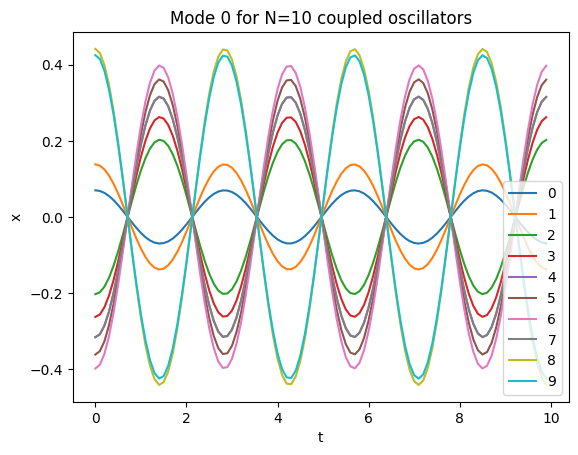

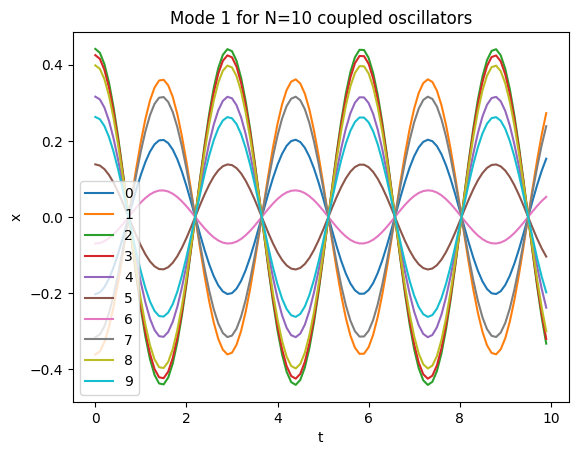

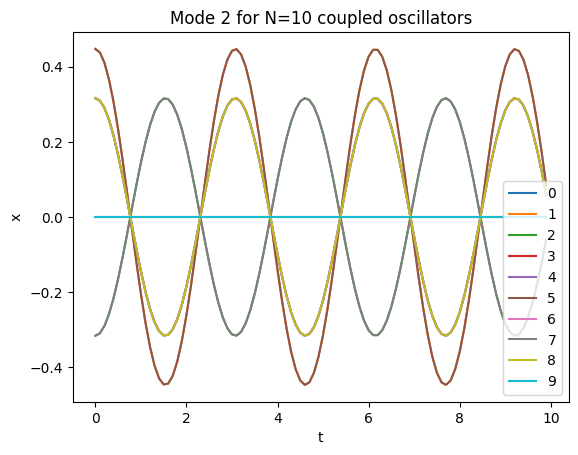

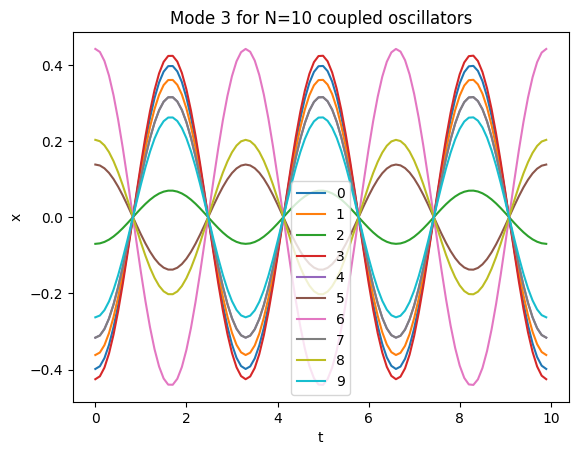

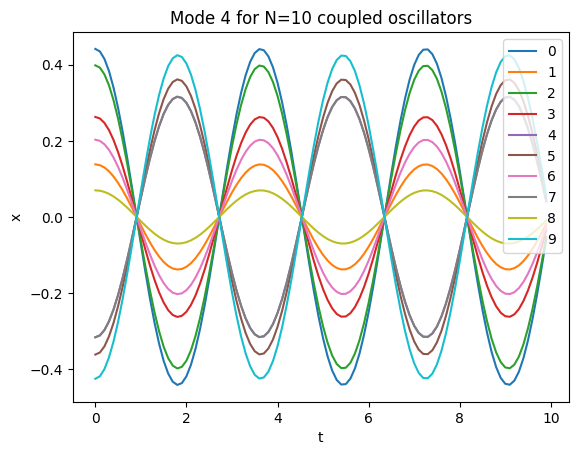

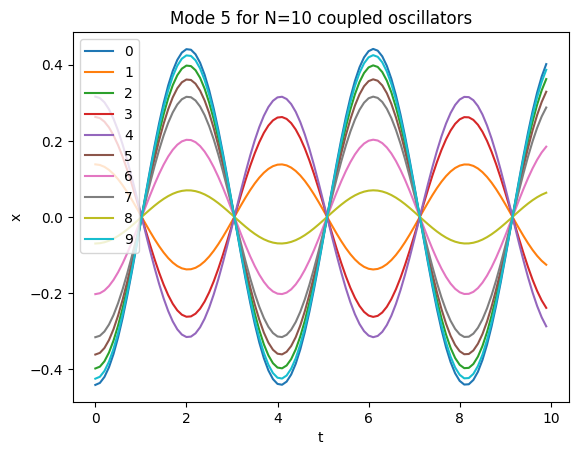

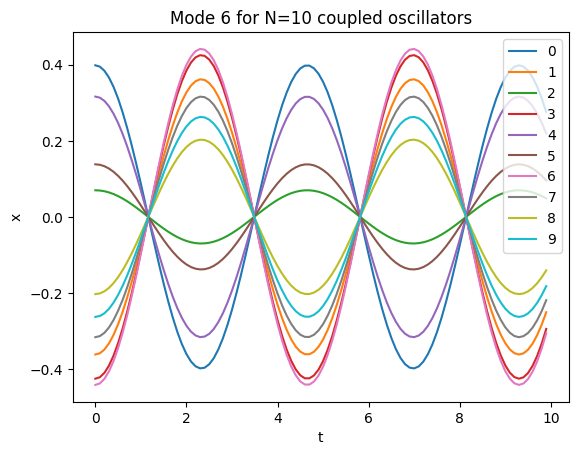

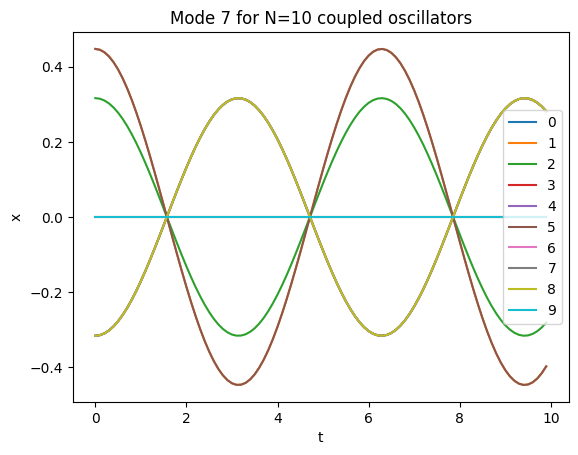

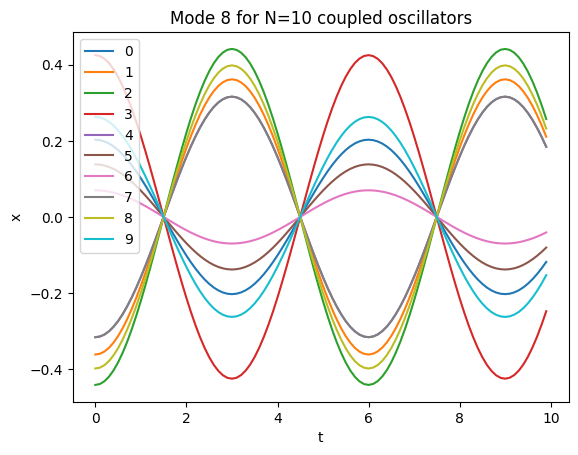

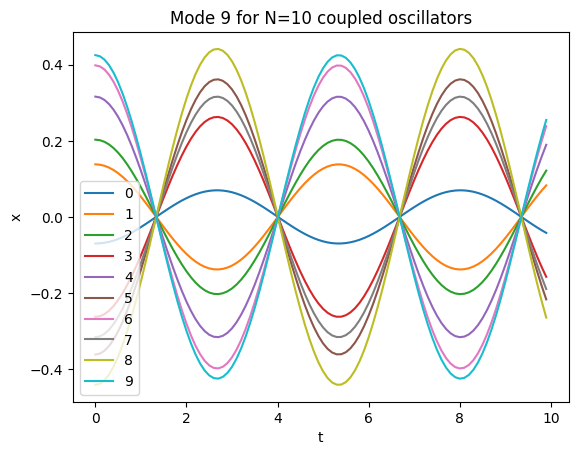

In [4]:
import time
import numpy.linalg as la

def make_dif_matrix(n, L, C, Cij):
    '''
    Cij = 01, 12, 23 34, etc
    Cij[0] and Cij[1] are adjacent to the second coupler
    '''
    A = np.zeros((n,n), dtype=int)
    
    for i in range(n):
        for j in range(n):
            if (i == j):
                if i == 0:
                    A[i,j] = -1/(L[i]*C[i]) - 1/(L[i]*Cij[i+1])
                elif i == n-1:
                    A[i,j] = -1/(L[i]*C[i]) - 1/(L[i]*Cij[i])
                else: 
                    A[i,j] = -1/(L[i]*C[i]) - 1/(L[i]*Cij[i]) - 1/(L[i]*Cij[i+1])
            elif i == j+1 or i == j-1:
                A[i,j] = 1/(L[j]*Cij[j])
    return A

def plot_Modes(N, eigenvals, eigenvecs, tmax):
    M = 9 #mode number
    t = np.arange(0,tmax,0.1)   # start,stop,step

    for n in Range(N):
        for i in Range(N):
            plt.plot(t,eigenvecs[n,i]*np.cos(np.sqrt(-eigenvals[n])*t), label=i)
   
        plt.title('Mode '+str(n)+' for N='+str(N)+' coupled oscillators')
        plt.xlabel("t")
        plt.ylabel("x")
        plt.legend()
        plt.show()

n = 10
L = np.ones(10)
C = np.ones(10)
Cij = np.ones(10)

A = make_dif_matrix(n, L, C, Cij)

eigenvals, eigenvecs = la.eig(A)

plot_Modes(N, eigenvals, eigenvecs, tmax = 10)

In [5]:
A

array([[-2,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -3,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, -3,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, -3,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, -3,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, -3,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, -3,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, -3,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, -3,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, -2]])